Algorytm SVM (Support vector machine). Jego głównym celem jest znalezienie najlepszego możliwego rozdzielenia między dwiema lub więcej klasami.

In [135]:
import pandas as pd
import numpy as np
 
from sklearn import svm
 
import matplotlib.pyplot as plt

n_cls = 20   # Number of samples in each class.
 
np.random.seed(1)  # for reproducibility
x11 = np.random.normal(0.5, 1, (n_cls, 1))
np.random.seed(2)  # for reproducibility
x12 = np.random.normal(0.4, 1, (n_cls, 1))
np.random.seed(3)  # for reproducibility
x21 = np.random.normal(-0.3, 1, (n_cls, 1))
np.random.seed(4)  # for reproducibility
x22 = np.random.normal(-0.5, 1, (n_cls, 1))
 
X = np.vstack((
    np.hstack((x11, x12)),
    np.hstack((x21, x22))
))
# np.vstack łaczy dane w pionie, a np.hstack w poziomie
#print(X.shape)  # (40, 2)
y = np.hstack((-1 * np.ones(n_cls), +1 * np.ones(n_cls)))
print(y)
#y.shape  # (40,)
clf = svm.SVC(kernel='linear', C=1000, random_state=1, probability=True)
#Tworzymy model z użyciem SVM z jądrem liniowym
#C=1000 → parametr regularyzacji (im większy, tym mniej "tolerancyjny" dla błędów),
#random_state=1 → dla powtarzalności,
#probability=True → żeby można było potem używać predict_proba() do
#  przewidywania prawdopodobieństw klas.
clf.fit(X, y)
#Uczymy model na danych X i y

[-1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
 -1. -1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.]


SVC(C=1000, kernel='linear', probability=True, random_state=1)

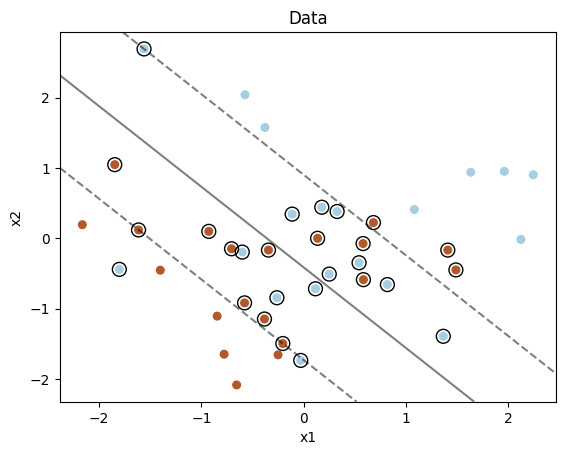

In [136]:
fig = plt.figure(1)
plt.clf()
 
plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=plt.cm.Paired)
 
# plot the decision function
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()
 
# create grid to evaluate model
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = clf.decision_function(xy).reshape(XX.shape)
 
# plot decision boundary and margins
ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
           linestyles=['--', '-', '--'])
# plot support vectors
ax.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=100,
           linewidth=1, facecolors='none', edgecolors='k')
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Data')
plt.show()


[[0.62900794 0.37099206]
 [0.26314362 0.73685638]]


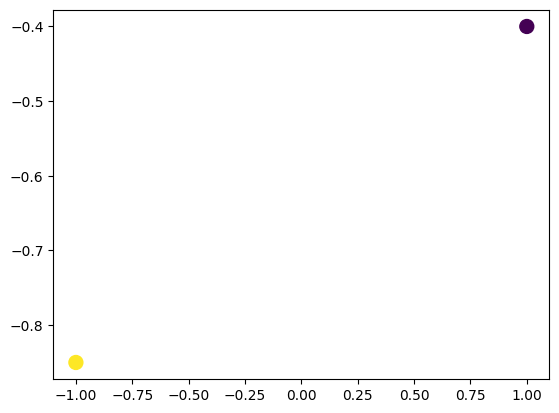

In [137]:
X_new = np.array([
    [1, -0.4],
    [-1, -0.85],
    ])
# nowe punkty do przewidzenia
y_new = clf.predict(X_new)
 #przewidujemy klasy dla nowych punktow 
plt.scatter(X_new[:, 0], X_new[:, 1], c=y_new, s=100)
fig.canvas.draw()
fig.canvas.flush_events()

# Get posterior probabilities for predictions (requires SVC to be created with
#   `probability=True`).
post_probs = clf.predict_proba(X_new)
print(post_probs)

62% ze punkt pierwszy nalezy do klasy -1, dla drugiego 73 ze do 2 

   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension  ...  worst texture  worst perimeter  worst area  \
0             

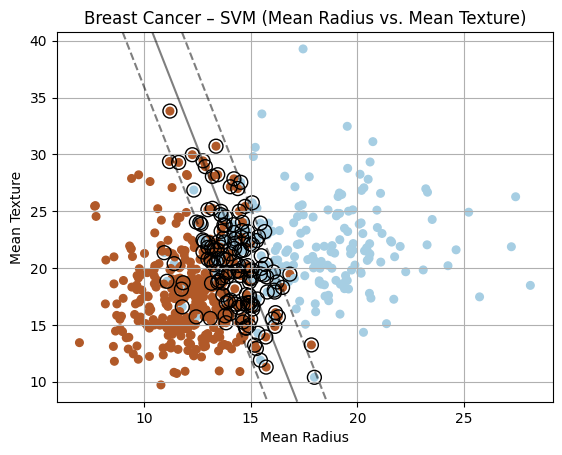

In [138]:
from sklearn.datasets import load_breast_cancer

# Wczytanie danych
data = load_breast_cancer()

# Tworzymy DataFrame
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target
print(df.head())

# Wybieramy cechy: mean radius i mean texture
X = df[['mean radius', 'mean texture']].values
y = df['target'].values

# Trening SVM
clf = svm.SVC(kernel='linear', C=1000, probability=True)
clf.fit(X, y)

fig = plt.figure(1)
plt.clf()

# Punkty danych
plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=plt.cm.Paired)

# Funkcja decyzyjna
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# Siatka
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = clf.decision_function(xy).reshape(XX.shape)

# Granice decyzyjne i marginesy
ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1],
           alpha=0.5, linestyles=['--', '-', '--'])

# Wektory wsparcia
ax.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],
           s=100, linewidth=1, facecolors='none', edgecolors='k')

# Opis osi
plt.xlabel('Mean Radius')
plt.ylabel('Mean Texture')
plt.title('Breast Cancer – SVM (Mean Radius vs. Mean Texture)')
plt.grid(True)
plt.show()

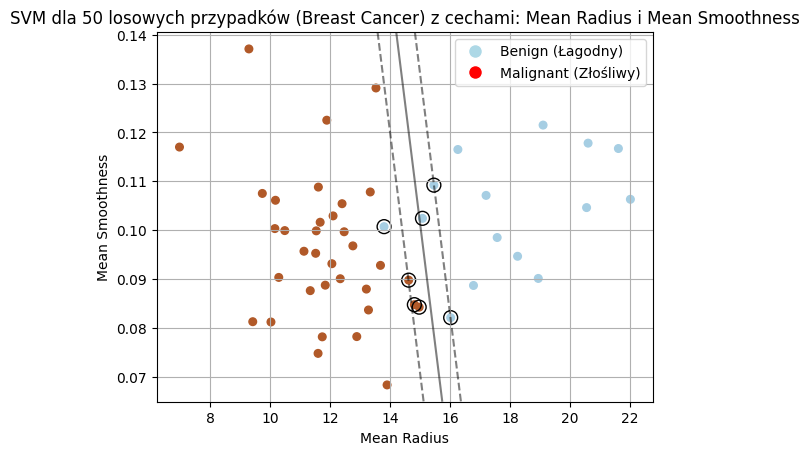

In [139]:
df_sample = df.sample(n=50, random_state=42)

# Wybieramy cechy: mean radius i mean smoothness
X = df_sample[['mean radius', 'mean smoothness']].values
y = df_sample['target'].values

# Trening SVM
clf = svm.SVC(kernel='linear', C=1000, probability=True)
clf.fit(X, y)

# Wizualizacja
fig = plt.figure(1)
plt.clf()

# Punkty danych z odpowiednim kolorem: Złośliwy = Czerwony, Łagodny = Bordowy
plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=plt.cm.Paired)

# Funkcja decyzyjna
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# Siatka
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = clf.decision_function(xy).reshape(XX.shape)

# Granice decyzyjne i marginesy
ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1],
           alpha=0.5, linestyles=['--', '-', '--'])

# Wektory wsparcia
ax.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],
           s=100, linewidth=1, facecolors='none', edgecolors='k')

# Opis osi oraz tytuł
plt.xlabel('Mean Radius')
plt.ylabel('Mean Smoothness')
plt.title('SVM dla 50 losowych przypadków (Breast Cancer) z cechami: Mean Radius i Mean Smoothness')

# Siatka
plt.grid(True)

# Dodanie legendy z poprawnymi kolorami (czerwony = złośliwy, bordowy = łagodny)
plt.legend(handles=[plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='lightblue', markersize=10, label='Benign (Łagodny)'),
                    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='red', markersize=10, label='Malignant (Złośliwy)')],
           loc='upper right')

# Pokaż wykres
plt.show()